# Week 6 - Pandas Practice

![FIFA19 cover image](EASportsFifa19.jpg)

[Image Source](https://www.nintendo.co.uk/Games/Nintendo-Switch/EA-SPORTS-FIFA-19-1388961.html)

In this review notebook, you will be doing some preprocessing and exploration on a dataset for the videogame [FIFA19](https://www.kaggle.com/karangadiya/fifa19). The dataset contains both data for the game as well as information about the players' real life careers.

In [4]:
# Imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1) Read the CSV file into a Pandas DataFrame

The data you'll be working with is in a file called `'fifa.csv'`. Use your knowledge of pandas to create a new DataFrame, called `df`, using the data from this CSV file. 

Check the contents of the first few rows of your DataFrame, then show the number of rows and columns in the DataFrame. 

In [5]:
# Replace None with appropriate code
df = pd.read_csv('fifa.csv')

In [6]:
# Code here to check the first few rows of the DataFrame
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500.0
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100.0
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100.0
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600.0
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400.0


In [7]:
# Code here to see the number of rows and columns in the DataFrame
df.shape

(18207, 88)

### 2) Drop rows from the DataFrame with missing values for `'Release Clause'`
    
Drop rows from the DataFrame for which "Release Clause" is missing. This is part of a soccer player's contract dealing with being bought out by another team. After you have dropped them, see how many rows are remaining in the DataFrame.

In [8]:
# Code here to drop rows from the DataFrame with missing values for 'Release Clause'
df.dropna(subset=['Release Clause'], inplace=True)

In [9]:
# Code here to check how many rows are left in the DataFrame
df.shape

(16643, 88)

### 3) Convert the `'Release Clause'` Price from Euros to Dollars

Now that there are no missing values, we can change the values in the `'Release Clause'` column from Euro to Dollar amounts.

Assume the current exchange rate is `1 Euro = 1.2 Dollars`

In [10]:
# Code here to convert the column of euros to dollars
df['Release Clause'] = df['Release Clause'] * 1.2

### 4) Find the top 10 countries with the most players (using the `'Nationality'` column). Create a bar chart showing the number of players from those 10 countries.

Don't forget to add a **title** and **x axis label** to your charts.

In [11]:
# Code here to get the top 10 countries with the most players
top_nationalities = df['Nationality'].value_counts().sort_values(ascending=False).head(10)
top_nationalities

England        1475
Germany        1151
Spain           974
France          853
Argentina       833
Brazil          788
Italy           579
Colombia        570
Japan           455
Netherlands     426
Name: Nationality, dtype: int64

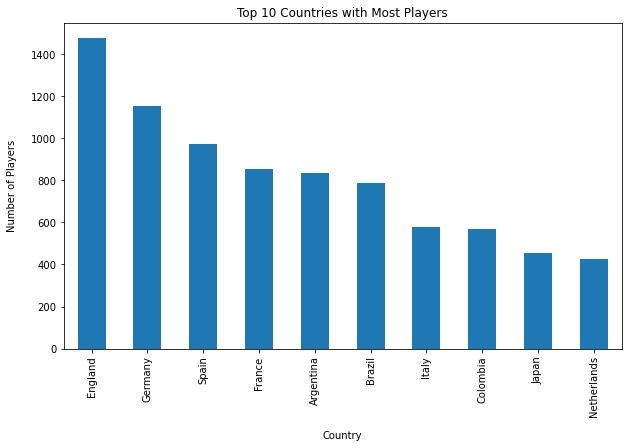

In [62]:
# Code here to plot a bar chart.  A recommended figsize is (10,6)
top_nationalities.plot(kind='bar', figsize=(10,6))
plt.xlabel("Country", labelpad=14)
plt.ylabel("Number of Players", labelpad=14)
plt.title("Top 10 Countries with Most Players")
plt.show()

### 5) Describe the relationship between `StandingTackle` and `SlidingTackle`, as shown in the scatter plot produced below.

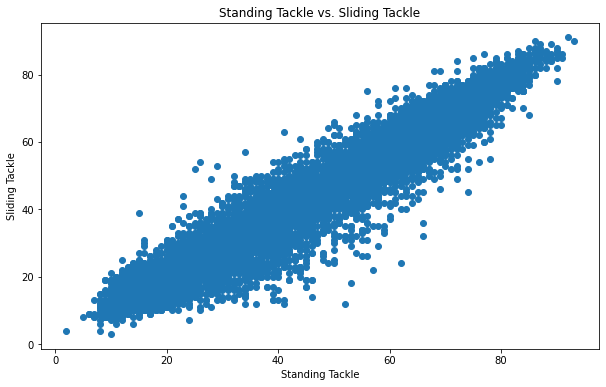

In [63]:
# Run this cell without changes

plt.figure(figsize=(10,6))

x = df['StandingTackle']
y = df['SlidingTackle']

plt.scatter(x, y)

plt.title('Standing Tackle vs. Sliding Tackle')
plt.xlabel('Standing Tackle')
plt.ylabel('Sliding Tackle')

plt.show()

Please describe in words the relationship between these two features:

- There appears to be a linear relationship between Standing Tackle and Sliding Tackle.


### 6) What are the mean age and the median age for the players in this dataset?

In [67]:
# Code here to find the mean age and median age
df['Age'].mean()
df['Age'].median()

df.Age.describe()

count    16643.000000
mean        25.226221
std          4.716588
min         16.000000
25%         21.000000
50%         25.000000
75%         29.000000
max         45.000000
Name: Age, dtype: float64

In your own words, how are the mean and median related to each other and what do these values tell us about the distribution of the column `'Age'`? 

- These means the data set has a symmetrical distribution.


### 7) Who is the oldest player from Argentina and how old is he?
Use the `Nationality` column.

In [91]:
# Code here to find the oldest player in Argentina

df[df.Age == df.Age.max()][['Name','Age']]

,Name,Age
4741,O. Pérez,45


## Additional Practice

Explore the data a bit, thinking about ways in which you might use this data - To become a better FIFA player? To learn more about statistics and soccer/football? To learn more about players?

Then, ask and answer three questions based on your exploration and potential use case. Share what you find on Slack, either to the cohort channel or with me directly, or we can discuss in your next one-on-one!

In [12]:
# Explore the data here

# I want to explore the "fit" in soccer.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16643 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        16643 non-null  int64  
 1   Name                      16643 non-null  object 
 2   Age                       16643 non-null  int64  
 3   Photo                     16643 non-null  object 
 4   Nationality               16643 non-null  object 
 5   Flag                      16643 non-null  object 
 6   Overall                   16643 non-null  int64  
 7   Potential                 16643 non-null  int64  
 8   Club                      16643 non-null  object 
 9   Club Logo                 16643 non-null  object 
 10  Value                     16643 non-null  object 
 11  Wage                      16643 non-null  object 
 12  Special                   16643 non-null  int64  
 13  Preferred Foot            16643 non-null  object 
 14  Intern

### Question 1

What is the typical demographic of players in the league?

In [ ]:
# Explore, analyze and answer your first question here

### Question 2

How much stamina is needed to be a top player?

In [ ]:
# Explore, analyze and answer your second question here

### Question 3

What is the success rate in penalities for the top 10 players?

In [ ]:
# Explore, analyze and answer your third question here